# W205 - Project 1

#### Priscilla Burity

Using data on bike trips and stations in San Fransisco, I'll use SQL queries and data visualizations to answer the following questions:
  
  * What are the 5 most popular trips that you would call "commuter trips"? 
  
  * What are your recommendations for offers (justify based on your findings)?

In [1]:
import pandas as pd
import matplotlib as plt

Most of the  trips in the dataset start in the morning and in the afternoon. 

SQL query:

```
select count(*) as total,
       sum(case when EXTRACT(hour FROM start_date) < 12 then 1 else 0 end) as Morning,
       sum(case when EXTRACT(hour FROM start_date) >= 12 and EXTRACT(hour FROM start_date) < 18 then 1 else 0 end) as Afternoon,
       sum(case when EXTRACT(hour FROM start_date) >= 18 then 1 else 0 end) as Evening
from `bigquery-public-data.san_francisco.bikeshare_trips` 
```


Waiting on bqjob_r373f480f02244cc5_00000174abe4cc5b_1 ... (0s) Current status: DONE   


<AxesSubplot:>

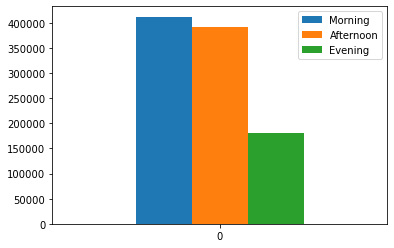

In [2]:
! bq query --use_legacy_sql=FALSE --format=csv 'select count(*) as total, sum(case when EXTRACT(hour FROM start_date) < 12 then 1 else 0 end) as Morning, sum(case when EXTRACT(hour FROM start_date) >= 12 and EXTRACT(hour FROM start_date) < 18 then 1 else 0 end) as Afternoon, sum(case when EXTRACT(hour FROM start_date) >= 18 then 1 else 0 end) as Evening from `bigquery-public-data.san_francisco.bikeshare_trips` '> result0.csv
trips_per_turn = pd.read_csv('result0.csv')
del trips_per_turn['total']

ax = trips_per_turn.plot.bar(rot=0)
ax


67% of total trips that occur in typical commuter hours. 

SQL query:
```
    select count(*) as total_trips,
       sum(case when (EXTRACT(hour FROM start_date) >= 5 and EXTRACT(hour FROM start_date) < 10) then 1 else 0 end)/(select count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` ) as share_morning,
       sum(case when (EXTRACT(hour FROM start_date) >= 16 and EXTRACT(hour FROM start_date) < 20) then 1 else 0 end)/(select count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` ) as share_evening
from `bigquery-public-data.san_francisco.bikeshare_trips` 

```

Aditionally, 20% of trips  of the dataset can be labeled as typical cummuter trips, as 10% of total trips start in the morning from train stations and 10% of total trips started in the evening end at train stations. I assume that commuters typically get at train and ferry boat stations in the morning and take a bike to go their workplace, and do the opposite at the end of the workday. The train and ferry boat stations we considered for this analysis are San Francisco Caltrain (Townsend at 4th), San Francisco Caltrain 2 (330 Townsend) and Harry Bridges Plaza (Ferry Building). The typical commuting hours is from 5AM to 10AM and between 4PM and 8PM.   

SQL query:
```
    select count(*) as total,
       sum(case when (EXTRACT(hour FROM start_date) >= 5 and EXTRACT(hour FROM start_date) < 10) and (start_station_name = "San Francisco Caltrain (Townsend at 4th)" or start_station_name = "San Francisco Caltrain 2 (330 Townsend)" or start_station_name = "Harry Bridges Plaza (Ferry Building)") then 1 else 0 end)/(select count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` ) as share_morning_start_trainstat,
       sum(case when (EXTRACT(hour FROM start_date) >= 16 and EXTRACT(hour FROM start_date) < 20) and (end_station_name = "San Francisco Caltrain (Townsend at 4th)" or end_station_name = "San Francisco Caltrain 2 (330 Townsend)" or end_station_name = "Harry Bridges Plaza (Ferry Building)") then 1 else 0 end)/(select count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` ) as share_evening_end_trainstat
from `bigquery-public-data.san_francisco.bikeshare_trips` 

```

In [3]:
! bq query --use_legacy_sql=FALSE --format=csv '    select count(*) as total, sum(case when (EXTRACT(hour FROM start_date) >= 5 and EXTRACT(hour FROM start_date) < 10) and (start_station_name = "San Francisco Caltrain (Townsend at 4th)" or start_station_name = "San Francisco Caltrain 2 (330 Townsend)" or start_station_name = "Harry Bridges Plaza (Ferry Building)") then 1 else 0 end)/(select count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` ) as share_morning_start_trainstat, sum(case when (EXTRACT(hour FROM start_date) >= 16 and EXTRACT(hour FROM start_date) < 20) and (end_station_name = "San Francisco Caltrain (Townsend at 4th)" or end_station_name = "San Francisco Caltrain 2 (330 Townsend)" or end_station_name = "Harry Bridges Plaza (Ferry Building)") then 1 else 0 end)/(select count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` ) as share_evening_end_trainstat from `bigquery-public-data.san_francisco.bikeshare_trips` '> result01.csv
share_commuter_trips1 = pd.read_csv('result01.csv')
share_commuter_trips1.columns = ['Total trips', '% of trips started from 5AM to 10AM leaving from train stations', '% of trips started from 4PM to 8PM ending at train stations']
share_commuter_trips1.set_index('Total trips', inplace=True)
share_commuter_trips1

Waiting on bqjob_r4842beb43f3e8c80_00000174abe4d4d2_1 ... (0s) Current status: DONE   


,% of trips started from 5AM to 10AM leaving from train stations,% of trips started from 4PM to 8PM ending at train stations
Total trips,,
983648,0.098207,0.105664


San Francisco Caltrain stations and the Ferry Building are the most popular start stations.

SQL query 

```

    SELECT  start_station_name ,
    COUNT( start_station_name ) AS `trips_per_station` 
    FROM     `bigquery-public-data.san_francisco.bikeshare_trips`
    GROUP BY start_station_name
    ORDER BY `trips_per_station` DESC 
    LIMIT 10
````


Waiting on bqjob_r45c27c93e85bfbe5_00000174abe4dc3a_1 ... (0s) Current status: DONE   


<AxesSubplot:xlabel='start_station_name'>

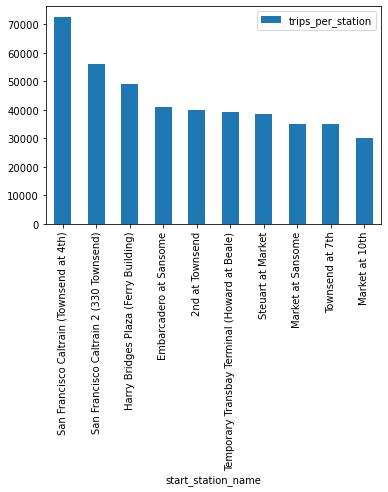

In [4]:
! bq query --use_legacy_sql=FALSE --format=csv '    SELECT  start_station_name , COUNT( start_station_name ) AS `trips_per_station`   FROM     `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name ORDER BY `trips_per_station` DESC LIMIT 10'> result11.csv
pop_stations = pd.read_csv('result11.csv')
pop_stations
ax = pop_stations.plot.bar(x = 'start_station_name', y = 'trips_per_station')
ax


The 5 most popular trips early in the morning (when commuters are heading to office/school) are Harry Bridges Plaza (Ferry Building) to 2nd at Townsend, San Francisco Caltrain (Townsend at 4th) to Temporary Transbay Terminal (Howard at Beale), Steuart at Market to 2nd at Townsend, San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th and San Francisco Caltrain (Townsend at 4th) to Embarcadero at Folsom.

SQL query:

```
   SELECT start_station_name, end_station_name,
       sum(case when (EXTRACT(hour FROM start_date) >=5 and EXTRACT(hour FROM start_date) < 10) then 1 else 0 end) as going_trip
       FROM `bigquery-public-data.san_francisco.bikeshare_trips`
       GROUP BY start_station_name, end_station_name
       ORDER BY `going_trip` DESC
       LIMIT 5    
```

In [5]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, sum(case when (EXTRACT(hour FROM start_date) >=5 and EXTRACT(hour FROM start_date) < 10) then 1 else 0 end) as going_trip FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY `going_trip` DESC LIMIT 5 '> result2.csv
pop_stations_morning = pd.read_csv('result2.csv')
pop_stations_morning

Waiting on bqjob_r5fe905f836d93693_00000174abe4e48f_1 ... (0s) Current status: DONE   


,start_station_name,end_station_name,going_trip
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4855
1,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),3856
2,Steuart at Market,2nd at Townsend,3840
3,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,3629
4,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3626


On the other hand, the 5 most popular trips in the late afternoon and early evening (when commuters are returning home) are 2nd at Townsend to Harry Bridges Plaza (Ferry Building), Embarcadero at Sansome to Steuart at Market and Embarcadero at Folsom to San Francisco Caltrain (Townsend at 4th), 2nd at South Park to Market at Sansome and Steuart at Market to San Francisco Caltrain (Townsend at 4th). 

SQL query:

```
   SELECT start_station_name, end_station_name,
       sum(case when EXTRACT(hour FROM start_date) >= 16 and EXTRACT(hour FROM start_date) < 20 then 1 else 0 end) as returning_trip,
       FROM `bigquery-public-data.san_francisco.bikeshare_trips`
       GROUP BY start_station_name, end_station_name
       ORDER BY `returning_trip` DESC
       LIMIT 5    
```

In [6]:
! bq query --use_legacy_sql=FALSE --format=csv '   SELECT start_station_name, end_station_name, sum(case when EXTRACT(hour FROM start_date) >= 16 and EXTRACT(hour FROM start_date) < 20 then 1 else 0 end) as returning_trip, FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY `returning_trip` DESC LIMIT 5 '> result3.csv
pop_stations_evening = pd.read_csv('result3.csv')
pop_stations_evening

Waiting on bqjob_r489f21af4014cada_00000174abe4ebca_1 ... (0s) Current status: DONE   


,start_station_name,end_station_name,returning_trip
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4456
1,Embarcadero at Sansome,Steuart at Market,4282
2,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4180
3,2nd at South Park,Market at Sansome,3573
4,Steuart at Market,San Francisco Caltrain (Townsend at 4th),3567


The most popular commuter trips start and end at train and ferry boat stations. As there are more potential costumers in these areas, I would recomend offers taking this into consideration. Examples: 
* A partnership with the train companies offering discounts in bike subscription fees for those who use the train system
* As those who drive bikes potentially care for their health, I would consider a partnership with gym centers near train stations, possibly offering discounts in these centers' subscription fees for Lyft Bay Wheels subscribers. 

